<div style="width:800px; margin:0 auto" >
    <div style="float: left; padding-right:1em" > <span style="font-size:215%; color:DodgerBlue"><b>Sistemas Recomendadores en </b> </span></div>
    <div style="float: left; width:130px"><img src="pythonlogo.png" ></div>
</div>


Los Sistemas Recomendadores analizan patrones de interés del usuario como artículos o productos para poder proporcionar recomendaciones personalizadas que satisfagan sus preferencias. 

Para poder llevar esto adelante se deben realizar diferentes tareas. 

Python tiene un gran cantidad de librerías que nos permiten y facilitan esto:
* Pandas: Herramienta de análisis / manipulación de datos muy potente y flexible; 
* SciKit-Learn: Librería de SciKit que provee técnicas de minería de datos y machine learning.
* SciKit-Surprise: Librería de SciKit para probar y evaluar diferentes algoritmos de recomendación. 
* Numpy: Librería de computación científica con funciones matemáticas de alto nivel para operar con vectores y matrices.
* Jupyter Notebook: Librería que permite crear y compartir documentos que contengan códigos, ecuaciones, visualizaciones y textos.  


In [51]:
print('Hola PyDay')

Hola PyDay


## Hola

<div style="display:flex">
   <h2>Dataset a utilizar: Películas de MovieLens con información de iMDB</h2>
   
</div>



<div>
    <div style="float:left">
      <ul>
      <li>45,000 películas. De cada película se conoce el título, género, plot, ganancias... </li>
      <li>270,000 usuarios.</li>
      <li>26,000,000 ratings (1,10)</li>
      <li>750,000 etiquetas sobre las películas</li>  
    </ul>
    </div>    
    <div style="float:left" >
        <img style="width:80px" src="movies.png">
    </div>
</div>


### Levántando los datos con Pandas

Pandas es la herramienta de análisis / manipulación de datos de código abierto más potente y flexible. Proporciona estructuras de datos rápidas, flexibles y expresivas diseñadas para que trabajar con datos relacionales o etiquetados.

In [1]:
import pandas as pd
import json
import ast
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def load_movies_metadata(file_path):
    df = pd.read_csv(file_path, dtype='unicode')
    
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: x.date())
    numeric_columns  = ['budget', 'vote_average','revenue','vote_count']
    for c in numeric_columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    
    # columnas en json
    json_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
    for column in json_columns:
        # Se usa ast porque los datos json tienen comillas simples en el csv, y no "
        df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
        
    
    return df

movies = load_movies_metadata('movies/movies_metadata.csv')


In [53]:
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,{u'backdrop_path': u'/9FBwqcd9IRruEDUrTdcaafOM...,30000000.0,"[{u'id': 16, u'name': u'Animation'}, {u'id': 3...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{u'id': 12, u'name': u'Adventure'}, {u'id': 1...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{u'iso_639_1': u'en', u'name': u'English'}, {...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,{u'backdrop_path': u'/hypTnLot2z8wpFS7qwsQHW1u...,0.0,"[{u'id': 10749, u'name': u'Romance'}, {u'id': ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [56]:
#movies['original_language'].unique()
#movies[movies['original_language']=='es']
movies.groupby('original_language').size()

original_language
104.0        1
68.0         1
82.0         1
ab          10
af           2
am           2
ar          39
ay           1
bg          10
bm           3
bn          29
bo           2
bs          14
ca          12
cn         313
cs         130
cy           1
da         225
de        1080
el         113
en       32269
eo           1
es         994
et          24
eu           3
fa         101
fi         297
fr        2438
fy           1
gl           1
         ...  
pa           2
pl         219
ps           2
pt         316
qu           1
ro          57
ru         826
rw           1
sh           5
si           1
sk           9
sl          17
sm           1
sq           5
sr          63
sv         384
ta          78
te          45
tg           1
th          76
tl          23
tr         150
uk          16
ur           8
uz           1
vi          10
wo           5
xx          33
zh         409
zu           1
Length: 92, dtype: int64

In [57]:
movies.columns

Index([u'adult', u'belongs_to_collection', u'budget', u'genres', u'homepage',
       u'id', u'imdb_id', u'original_language', u'original_title', u'overview',
       u'popularity', u'poster_path', u'production_companies',
       u'production_countries', u'release_date', u'revenue', u'runtime',
       u'spoken_languages', u'status', u'tagline', u'title', u'video',
       u'vote_average', u'vote_count'],
      dtype='object')

In [58]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45463 non-null float64
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45376 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null object
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [59]:
genres = []
for i,row in movies.iterrows():
    if row['genres'] is not np.nan:
        a = row['genres']
        for item in a:
            if item['name'] not in genres:
                genres.append(item['name'])
print(genres)

['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie', 'Carousel Productions', 'Vision View Entertainment', 'Telescene Film Group Productions', 'Aniplex', 'GoHands', 'BROSTA TV', 'Mardock Scramble Production Committee', 'Sentai Filmworks', 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'The Cartel']


Calcular el género cinematográfico que tuvo más ganancias.

In [60]:
genre_revenue = {}

for i in range(movies.shape[0]):
    for item in movies.iloc[i]['genres']:
        if 'name' in item and movies.iloc[i]['revenue'] >0:
            genre_name = item['name']
            b = int(movies.iloc[i]['revenue'])/1000000
            if genre_name in genre_revenue:
                genre_revenue[genre_name]['total_revenue'] += b 
            else:
                genre_revenue[genre_name] = {}
                genre_revenue[genre_name]['genre'] = genre_name
                genre_revenue[genre_name]['total_revenue'] = b

most_profitable_genre = pd.DataFrame(None,None,columns=['genre','revenue'])

for k,v in genre_revenue.items():
    most_profitable_genre =  most_profitable_genre.append({'genre':v['genre'],'revenue':v['total_revenue']},ignore_index=True)

In [61]:
most_profitable_genre = most_profitable_genre.sort_values(by='revenue',ascending=False)

In [62]:
most_profitable_genre.head()

,genre,revenue
13,Action,200726
11,Adventure,199616
15,Comedy,165797
6,Drama,159386
18,Thriller,129054


### Visualización de Datos

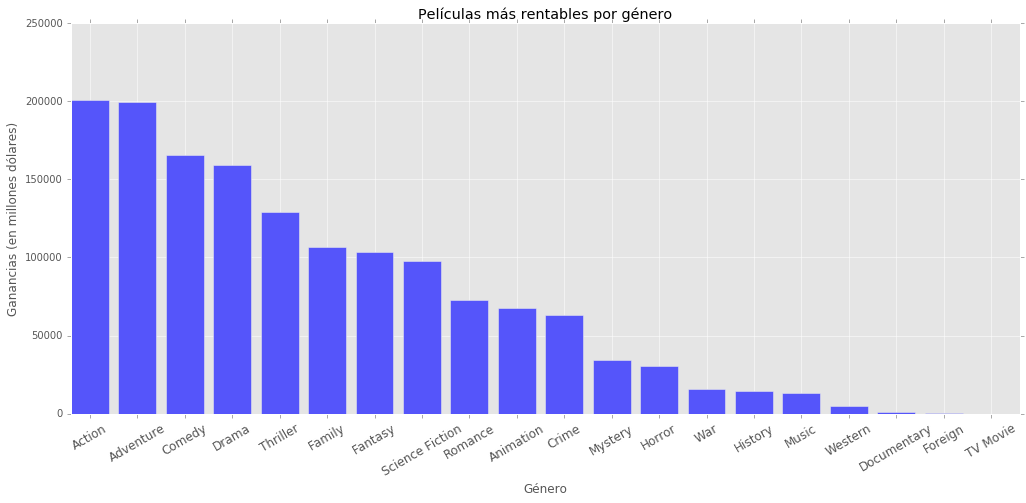

In [63]:
plt.style.use('ggplot')
plt.figure(figsize=(17,7))
number_of_genres= len(most_profitable_genre['genre'])
index = np.arange(number_of_genres)
bar_width = 0.8
plt.bar(index, most_profitable_genre['revenue'], bar_width, color='#5555FA' )
plt.gca().set_xlabel(u"Género")
plt.gca().set_ylabel(u"Ganancias (en millones dólares)")
plt.xticks(index +bar_width/2, most_profitable_genre['genre'],rotation=30, fontsize=12)
plt.gca().set_title(u"Películas más rentables por género")
plt.show()

También podemos ver la cantidad máxima de votos para cada género

In [64]:
genre_vote_count = {}

for i,_ in movies.iterrows():   
    for item in movies.loc[i]['genres']:
        
        if 'name' in item and movies.loc[i]['vote_count'] >0:
            a = item['name']
            b = movies.loc[i]['vote_count']
            if a in genre_vote_count:
                genre_vote_count[a]['total_votes'] += b 
            else:
                genre_vote_count[a] = {}
                genre_vote_count[a]['genre'] = a
                genre_vote_count[a]['total_votes'] = b

most_votes_genre = pd.DataFrame(None,None,columns=['genre','total_votes'])

for k,v in genre_vote_count.items():
    most_votes_genre =  most_votes_genre.append({'genre':v['genre'],'total_votes':v['total_votes']},ignore_index=True)

In [66]:
most_votes_genre = most_votes_genre.sort_values(by='total_votes',ascending=False)
most_votes_genre.head()

,genre,total_votes
1,Drama,1956070.0
13,Action,1708508.0
15,Comedy,1438185.0
11,Adventure,1434576.0
18,Thriller,1434045.0


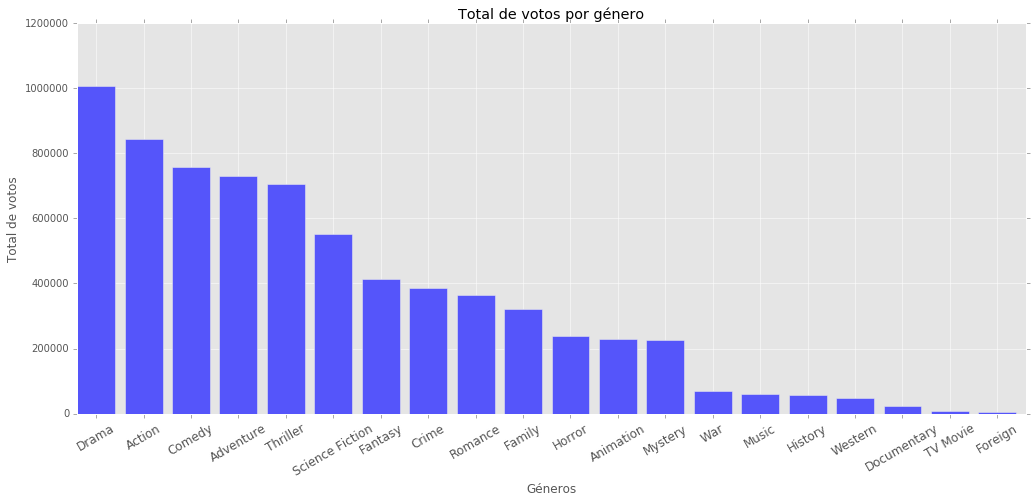

In [66]:
number_of_genres= len(most_votes_genre['genre'])
index = np.arange(number_of_genres)
bar_width = 0.8
plt.figure(figsize=(17,7))
plt.bar(index, most_votes_genre['total_votes'], bar_width, color='#5555FA' )
plt.gca().set_xlabel(u"Género")
plt.gca().set_ylabel(u"Total de votos")
plt.xticks(index +bar_width/2, most_votes_genre['genre'],rotation=30, fontsize=12)
plt.gca().set_title(u"Total de votos por género")
plt.xlabel(u"Géneros")
plt.ylabel(u"Total de votos")
plt.show()


#### Relación entre ratings y las ganancias

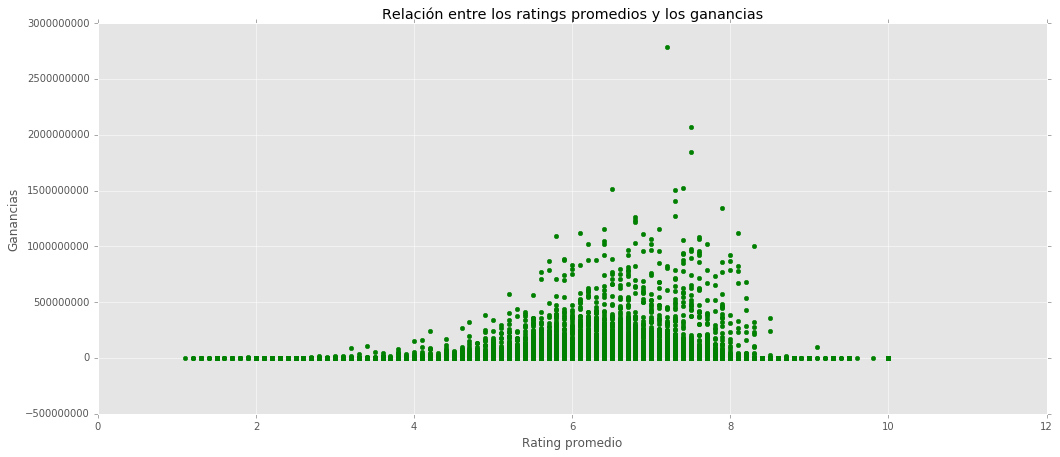

In [74]:
revenue_votes=movies[movies['vote_average']>1]
plt.figure(figsize=(17,7))
plt.scatter(revenue_votes['vote_average'],revenue_votes['revenue'], c='g', edgecolors='g', alpha=1)
plt.ylabel('Ganancias')
plt.xlabel('Rating promedio')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title(u'Relación entre los ratings promedios y los ganancias')

plt.show()

In [78]:
#index=revenue_votes['revenue'].idxmax()
#print(movies.loc[index]['title'])

#### Distribución de ratings

In [68]:
ratings=pd.read_csv('movies/ratings.csv')
ratings=ratings.groupby('rating').size().reset_index(name='count')
ratings.sort_values('count', ascending=False, inplace=True)
ratings

,rating,count
7,4.0,28750
5,3.0,20064
9,5.0,15095
6,3.5,10538
8,4.5,7723
3,2.0,7271
4,2.5,4449
1,1.0,3326
2,1.5,1687
0,0.5,1101


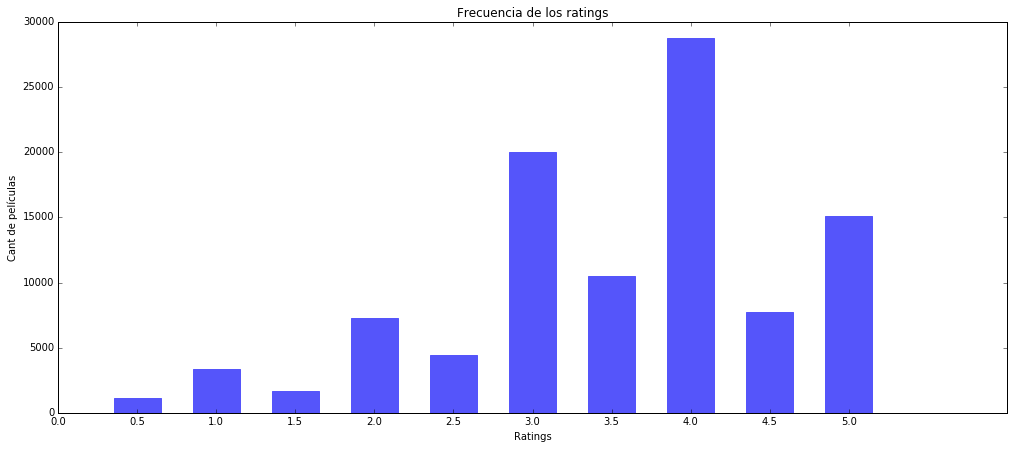

In [50]:
ratings.sort_values('rating', inplace=True)
index= np.arange(0.5,5.5,0.5)
plt.figure(figsize=(17,7))

plt.bar(index, ratings['count'], color='#5555FA', edgecolor='#5555FA', align='center', width=0.3)
plt.xlabel(u'Ratings')
plt.ylabel(u'Cant de películas')
plt.title(u'Frecuencia de los ratings')

plt.xticks(np.arange(0,5.5,0.5))
plt.show()

#### Cantidad de calificaciones por película

In [70]:
ratings=pd.read_csv('movies/ratings.csv')
media_rating = ratings['rating'].mean()
print media_rating

ratings=ratings.groupby('movieId').size().reset_index(name='count')    
ratings.sort_values('count', ascending=False, inplace=True)
ratings[ratings['count']>1]



3.543608255669773


,movieId,count
321,356,341
266,296,324
284,318,311
525,593,304
232,260,291
427,480,274
2062,2571,259
0,1,247
472,527,244
522,589,237


### Sistema Recomendador basado en la información de las películas

Obtener mejores recomendaciones para la peli The Dark Knight, acá conocida como "Batman: el caballero de la noche".

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [120]:
corpus =['yo programo en python', 'python y yo yo y', 'programo mucho']
example = tf.fit(corpus)
data= example.transform(corpus).todense()
pd.DataFrame(data=data,  index=corpus, columns=example.get_feature_names())

,en,mucho,programo,python,yo
yo programo en python,1,0,1,1,1
python y yo yo y,0,0,0,1,2
programo mucho,0,1,1,0,0


In [91]:
movies['tagline'] = movies['tagline'].fillna('')
movies['description'] = movies['overview'] + movies['tagline']
movies['description'] = movies['description'].fillna('')

tf = CountVectorizer(analyzer='word', stop_words='english')
tfidf_matrix = tf.fit_transform(movies['description'])

##### Similitud del coseno

In [122]:
from sklearn.metrics.pairwise import  cosine_similarity

film1_index = np.where(movies["title"] =="The Dark Knight")[0]
tfidf_vector_film_1 =tfidf_matrix[film1_index,:]
distances = cosine_similarity(tfidf_vector_film_1, tfidf_matrix)[0]
indices_of_most_simmilar_films = distances.argsort()[-15:-1]
movies.iloc[indices_of_most_simmilar_films]["title"]



585                                                 Batman
40974    LEGO DC Comics Super Heroes: Batman: Be-Leaguered
18009                               This Must Be the Place
41976                                The Lego Batman Movie
18035                                     Batman: Year One
20232              Batman: The Dark Knight Returns, Part 2
21194    Batman Unmasked: The Psychology of the Dark Kn...
26102                                       Going Straight
150                                         Batman Forever
28023                                      The Dead Season
15511                           Batman: Under the Red Hood
1328                                        Batman Returns
40658                                             Paranoia
18252                                The Dark Knight Rises
Name: title, dtype: object

### Utilizando Sistemas Recomendadores con Surprise

In [10]:
from surprise import Reader, Dataset, KNNBasic, evaluate, accuracy
from surprise.model_selection import KFold

In [128]:
ratings=pd.read_csv('movies/ratings.csv')
#print(ratings.head())

In [130]:
# Reader se define para especificar la escala de ratings.
reader = Reader(rating_scale=(0.5, 5))

# Las columnas deben ser: user id, item id, ratings, se debe respetar ese orden.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


![](sparse_matrix_sm.png)

##### Filtrado Colaborativo enfoque item-item

In [73]:
# Se define un iterador para poder hacer cross-validation
kf = KFold(n_splits=3)

sim_options = {'name': 'cosine',
               'user_based': False  # para que compare items 
              }
        
algo = KNNBasic(sim_options=sim_options)

for trainset, testset in kf.split(data):

    # Se entrena y se corre el algoritmo.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Se evalua la performance calculando el error RMSE
    accuracy.rmse(predictions, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9970
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9874
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9905


##### Filtrado Colaborativo enfoque usuario-usuario

In [20]:
# Se define un iterador de cross-validation
kf = KFold(n_splits=3)

sim_options = {'name': 'pearson_baseline'}
        
algo = KNNBasic(sim_options=sim_options)

for trainset, testset in kf.split(data):

    # Se entrena y se corre el algoritmo.
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    # Se evalua la performance calculando el error RMSE
    accuracy.rmse(predictions, verbose=True)
    accuracy.fcp(predictions, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0061
FCP:  0.6477
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0137
FCP:  0.6428
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0242
FCP:  0.6398


Predecir un rating con mi modelo

In [145]:
two_ratings = list(algo.trainset.all_ratings())[0:2]

uid = algo.trainset.to_raw_uid(two_ratings[0][0])  #user id 
iid = algo.trainset.to_raw_iid(two_ratings[1][1])  #item id 

# prediccion de rating para ese usuario y ese item.
pred = algo.predict(uid, iid,  verbose=True)

user: 631        item: 1584       r_ui = None   est = 3.79   {u'actual_k': 23, u'was_impossible': False}


### Kaggle

https://www.kaggle.com/

Hay muchos datasets disponibles y notebooks con análisis de datos, y recomendaciones.



https://github.com/mcharnelli/PyDayLP2018 